# 關於Pandas
* 用read的時候，也可以用URL
* 計算次數的語法:df.count(), 依項目集合值: df.groupby(項目)
* 長條圖的方法: df.項目.plt(kind='bar')
* 改變df中，數字的方法:df.loc[raws:raws,col:col]，或是可以用條件式df.loc[條件]
* loc可以想成選擇的概念
* 移動平均語法:df.rolling(window=20).mean，window可以忽略，不過這樣寫比較直觀


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('http://bit.ly/uforeports')  

In [4]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
df_state = df.groupby('State').count()

In [6]:
df_state.sort_values(by = 'Time',ascending=False,inplace=True)

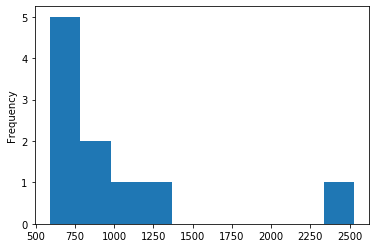

In [7]:
df_state[:10].Time.plot(kind='hist')  #前十大，次數，長條圖的分析

In [8]:
df = pd.DataFrame(np.random.randn(5,3),index=range(1,6),columns=list('abc'))

In [9]:
df.head()

,a,b,c
1,-0.313747,1.242600,0.728424
2,0.017161,-0.925766,-1.254882
3,0.128334,-0.456894,0.386914
4,-0.884374,-0.274419,-0.646845
5,1.994598,-0.154181,0.617098


In [46]:
df[df.b>0]  #找出df中的東西

,a,b,c
1,0.560794,0.511775,-0.527376
3,-0.252733,1.066382,0.436000
5,-1.059890,3.030866,-0.176827


In [50]:
df_new=df[df.b>0]['c' ]=0
df_new
#很直觀的想法。讓b>0的項目，c通通為0。但不能這樣寫，這樣會變成新的df全部為0

C:\Users\t.g.c\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [52]:
df.loc[df.b>0,'c']=0

In [53]:
df

,a,b,c
1,0.560794,0.511775,0.000000
2,-0.964248,-1.398925,-0.540454
3,-0.252733,1.066382,0.000000
4,0.355928,-2.502776,1.462659
5,-1.059890,3.030866,0.000000


In [55]:
import pandas_datareader.data as web

In [56]:
df = web.DataReader('AAPL','yahoo',start='2012-9-1',end='2017-8-31')

In [57]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-31,95.514282,93.892860,95.321426,95.034286,84580300.0,65.604202
2012-09-04,96.448570,94.928574,95.108574,96.424286,91973000.0,66.563766
2012-09-05,96.621429,95.657143,96.510002,95.747147,84093800.0,66.096298
2012-09-06,96.898575,95.828575,96.167145,96.610001,97799100.0,66.691956
2012-09-07,97.497147,96.538574,96.864288,97.205711,82416600.0,67.103195


In [59]:
P = df['Adj Close']
P.head()

Date
2012-08-31    65.604202
2012-09-04    66.563766
2012-09-05    66.096298
2012-09-06    66.691956
2012-09-07    67.103195
Name: Adj Close, dtype: float64

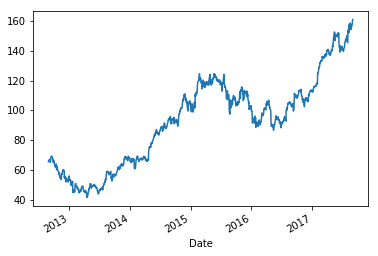

In [61]:
P.plot()

# 投資報酬率可以這樣算
$$ (Pt-Pt-1)/Pt-1 $$

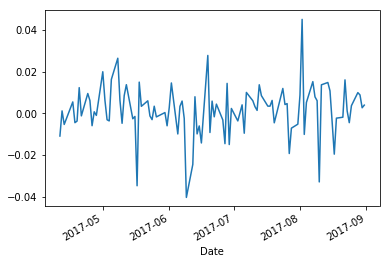

In [69]:
r= P.diff()/P #跟前一天的差距/原本資料
r[-100:].plot()

# 移動平均=像是一個移動window

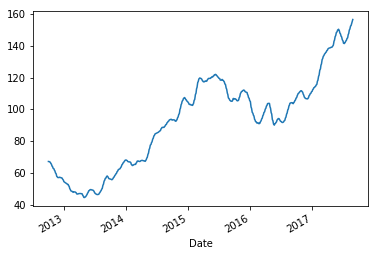

In [77]:
k=P.rolling(20).mean()
k.plot()

In [17]:
df.a

1   -0.313747
2    0.017161
3    0.128334
4   -0.884374
5    1.994598
Name: a, dtype: float64